<a href="https://colab.research.google.com/github/Ali-Alameer/Deep-Learning/blob/main/week10_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
235/235 [==============================] - 8s 26ms/step - loss: 0.2766 - val_loss: 0.1890
Epoch 2/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1677 - val_loss: 0.1514
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1433 - val_loss: 0.1336
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1279 - val_loss: 0.1202
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 0.1170 - val_loss: 0.1115
Epoch 6/10
235/235 [==============================] - 4s 15ms/step - loss: 0.1097 - val_loss: 0.1055
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1047 - val_loss: 0.1016
Epoch 8/10
235/235 [==============================] - 3s 11ms/step - loss: 0.1013 - val_loss: 0.0987
Epoch 9/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0990 - val_loss: 0.0967
Epoch 10/10
313/313 [=====

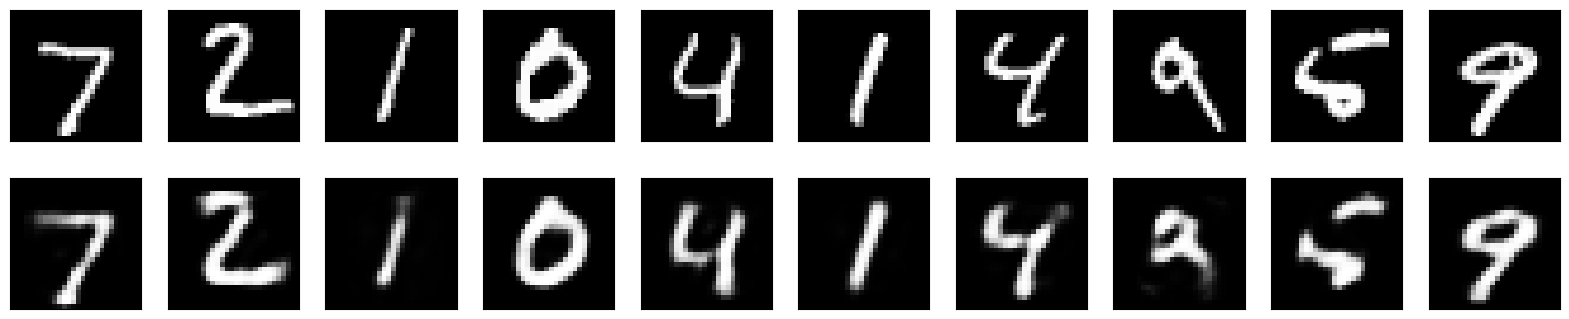

In [ ]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape the input images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder architecture
input_dim = x_train.shape[1]
encoding_dim = 32  # Number of neurons in the hidden layer
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode the test images
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)

# Display the original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()